# Insurance Customer Conversion Model
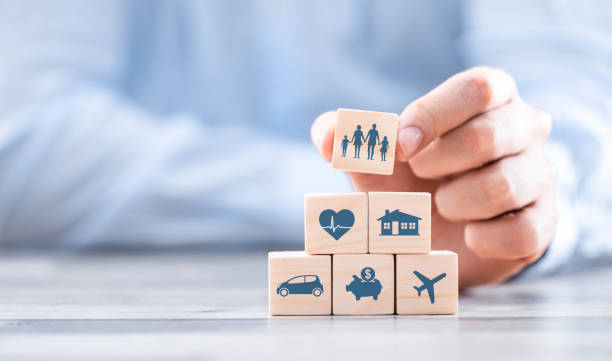

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('train_insurance.csv')

In [62]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


# Data Cleaning

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [64]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [65]:
df.duplicated().sum()

6

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df.duplicated().sum()

0

In [68]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


<AxesSubplot:xlabel='y', ylabel='count'>

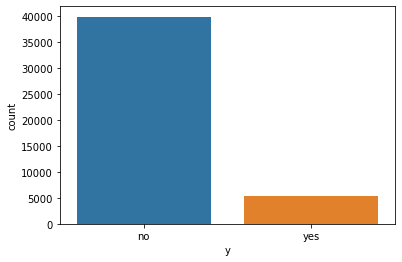

In [69]:
sns.countplot(data=df, x=df['y'])

<AxesSubplot:xlabel='marital', ylabel='count'>

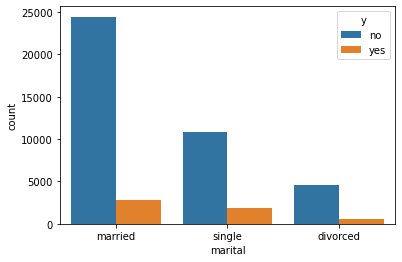

In [70]:
sns.countplot(data=df, x=df['marital'], hue=df['y'])

<AxesSubplot:xlabel='education_qual', ylabel='count'>

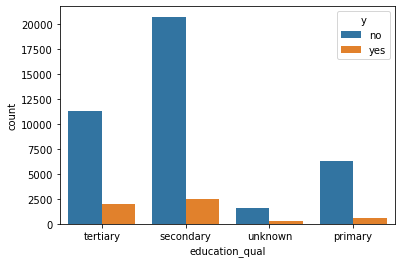

In [71]:
sns.countplot(data=df, x=df['education_qual'], hue=df['y'])

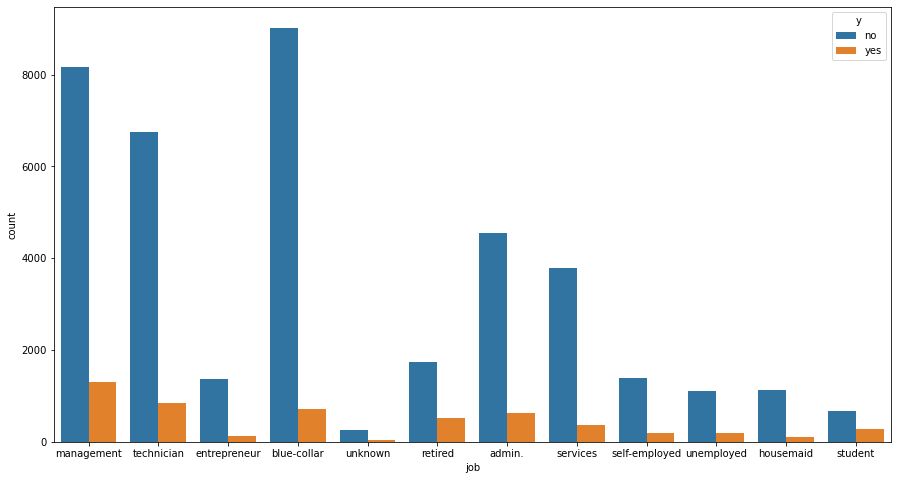

In [72]:
plt.figure(figsize = (15,8))
sns.countplot(data=df, x=df['job'], hue=df['y'])
plt.show()

In [73]:
df.call_type.value_counts() #Imputing doesn't make sense as there is more unknown

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [74]:
df.education_qual.value_counts() #Impute with mode as unknown percentage is less

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [75]:
df.job.value_counts() #Impute with mode as unknown percentage is less

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [76]:
df.marital.value_counts() 

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [77]:
df.mon.value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [78]:
df.prev_outcome.value_counts() #Imputing doesn't make sense as there is more unknown

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [79]:
df['education_qual'] = df['education_qual'].replace('unknown', df.education_qual.mode()[0])

In [80]:
df.education_qual.value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [81]:
df['job'] = df['job'].replace('unknown', df.job.mode()[0])

In [82]:
df.job.value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [83]:
# IQR Claculation for age
iqr_age = df.age.quantile(0.75) - df.age.quantile(0.25)
upper_threshold_age = df.age.quantile(0.75) + (1.5 * iqr_age) # q3 + 1.5iqr
lower_threshold_age = df.age.quantile(0.25) - (1.5 * iqr_age) # q1 - 1.5iqr

In [84]:
# IQR Claculation for duration
iqr_dur = df.dur.quantile(0.75) - df.dur.quantile(0.25)
upper_threshold_dur = df.dur.quantile(0.75) + (1.5 * iqr_dur) # q3 + 1.5iqr
lower_threshold_dur = df.dur.quantile(0.25) - (1.5 * iqr_dur) # q1 - 1.5iqr

In [85]:
# IQR Claculation for number of calls
iqr_num_call = df.num_calls.quantile(0.75) - df.num_calls.quantile(0.25)
upper_threshold_num_call = df.num_calls.quantile(0.75) + (1.5 * iqr_num_call) # q3 + 1.5iqr
lower_threshold_num_call = df.num_calls.quantile(0.25) - (1.5 * iqr_num_call) # q1 - 1.5iqr

In [86]:
# Creating a new dataframe for the outlier content
df1 = df
df1.age = df.age.clip(lower_threshold_age, upper_threshold_age, axis=0)
df1.dur = df.dur.clip(lower_threshold_dur, upper_threshold_dur, axis=0)
df1.num_calls = df.num_calls.clip(lower_threshold_num_call, upper_threshold_num_call, axis=0)

In [87]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.869052,15.80688,234.95620,2.392235
std,10.395247,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,70.500000,31.00000,643.00000,6.000000


In [88]:
df['target'] = df.y.map({'yes':1, 'no':0})

In [89]:
df.groupby('prev_outcome')['target'].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: target, dtype: float64

In [90]:
df.groupby('day')['target'].mean().sort_values(ascending=False)

day
1     0.279503
10    0.230916
30    0.173052
22    0.170166
3     0.164968
4     0.159170
25    0.158333
12    0.152215
13    0.152050
2     0.140867
15    0.139753
24    0.138702
16    0.135689
23    0.134185
27    0.133809
11    0.122380
9     0.114744
14    0.113636
5     0.112565
26    0.112077
8     0.109239
21    0.099210
18    0.098787
6     0.093685
17    0.090768
7     0.086406
28    0.078185
29    0.073926
31    0.071540
20    0.069767
19    0.069476
Name: target, dtype: float64

<AxesSubplot:ylabel='mon'>

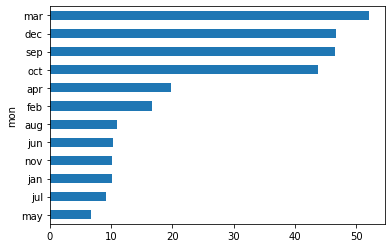

In [91]:
(df.groupby('mon')['target'].mean()*100).sort_values().plot(kind='barh')

<AxesSubplot:ylabel='job'>

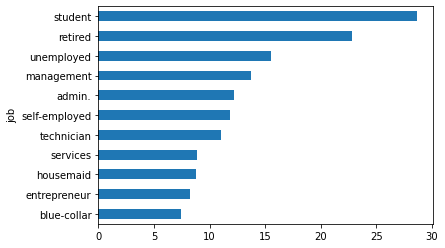

In [92]:
(df.groupby('job')['target'].mean()*100).sort_values().plot(kind='barh')

<AxesSubplot:ylabel='call_type'>

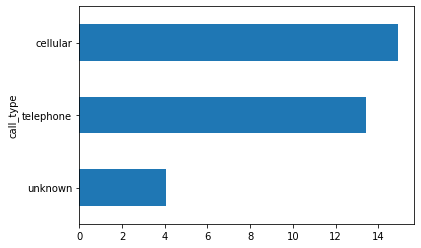

In [93]:
(df.groupby('call_type')['target'].mean()*100).sort_values().plot(kind='barh')

<AxesSubplot:ylabel='education_qual'>

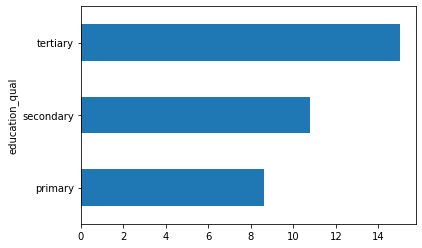

In [94]:
(df.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind='barh')

<AxesSubplot:ylabel='marital'>

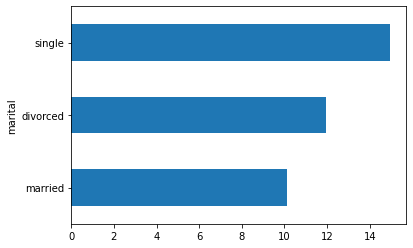

In [95]:
(df.groupby('marital')['target'].mean()*100).sort_values().plot(kind='barh')

<AxesSubplot:ylabel='prev_outcome'>

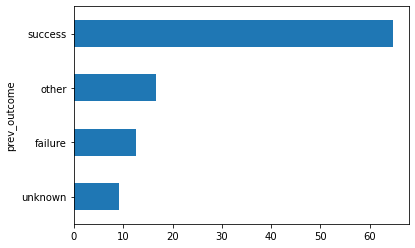

In [96]:
(df.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind='barh')

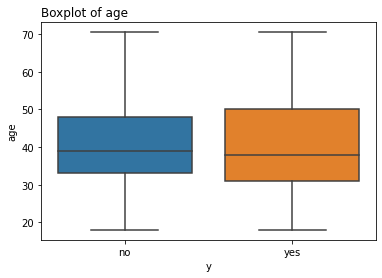

In [97]:
# boxplot
ax = sns.boxplot(x=df.y, y=df.age, data=df)

# add title
plt.title("Boxplot of age", loc="left")

# show the graph
plt.show()

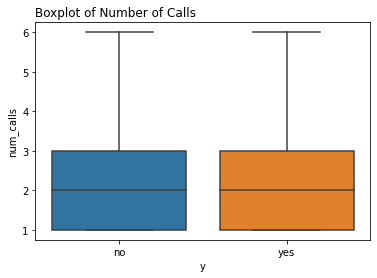

In [98]:
# boxplot
ax = sns.boxplot(x=df.y, y=df.num_calls, data=df)

# add title
plt.title("Boxplot of Number of Calls", loc="left")

# show the graph
plt.show()

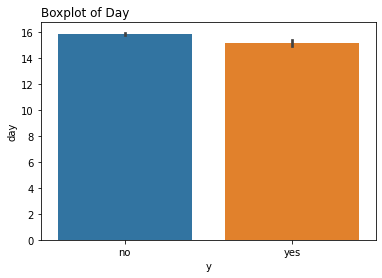

In [99]:
# boxplot
ax = sns.barplot(x=df.y, y=df.day, data=df)

# add title
plt.title("Boxplot of Day", loc="left")

# show the graph
plt.show()

In [100]:
df['prev_outcome'] = df['prev_outcome'].map({'unknown':0,'failure':1,'other':2,'success':3})

In [101]:
df['marital'] = df['marital'].map({'married':0,'divorced':1,'single':2})

In [102]:
df['education_qual'] = df['education_qual'].map({'primary':0,'secondary':1,'tertiary':2})

In [103]:
df['call_type'] = df['call_type'].map({'unknown':0,'telephone':1,'cellular':2})

In [104]:
df['job'] = df['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'self-employed':5,'admin.':6,'management':7,'unemployed':8,'retired':9,'student':10})

In [105]:
df['mon'] = df['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

In [106]:
df.job.unique()

array([ 7,  4,  1,  0,  9,  6,  3,  5,  8,  2, 10], dtype=int64)

In [107]:
df.marital.unique()

array([0, 2, 1], dtype=int64)

In [108]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [109]:
X = df.drop(columns = ['y', 'target'])

In [110]:
X.shape

(45205, 10)

In [111]:
y = df['target'].to_frame()

In [112]:
y.shape

(45205, 1)

In [113]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y.values.ravel())

RandomForestClassifier()

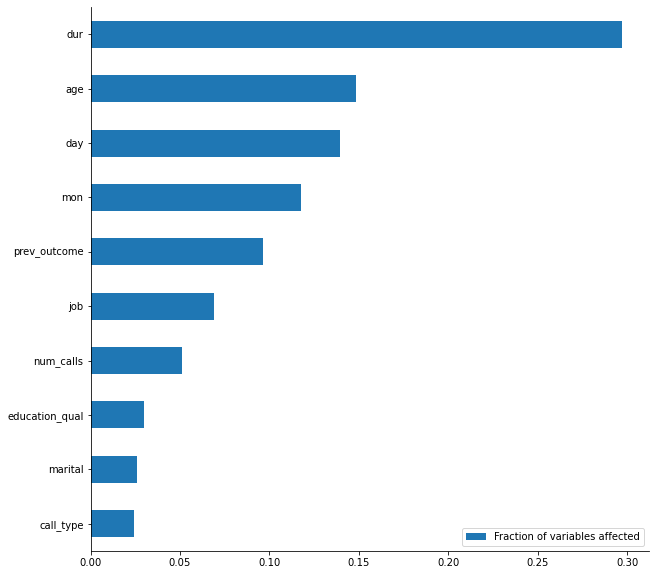

In [114]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 10))
sns.despine()

In [115]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
target            0
dtype: int64

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [117]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy = 'all')

Xt_smt, yt_smt = smt.fit_resample(X_train,y_train)

In [118]:
yt_smt.value_counts()

target
1         28843
0         22667
dtype: int64

# Logistic Regression

In [119]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(Xt_smt) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(Xt_smt) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()
model_LR.fit(X_train_scaled, yt_smt)

E:\New folder\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [121]:
y_predict = model_LR.predict(X_test_scaled)

In [122]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.73      0.83      9978
           1       0.30      0.87      0.44      1324

    accuracy                           0.74     11302
   macro avg       0.64      0.80      0.64     11302
weighted avg       0.90      0.74      0.79     11302



<AxesSubplot:>

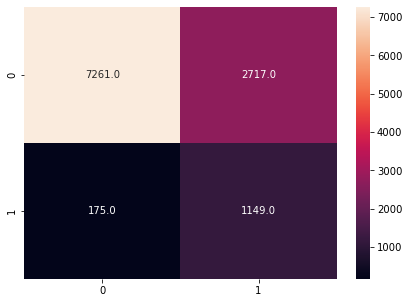

In [123]:
cm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize =(7,5))
sns.heatmap(cm, annot=True, fmt = '.1f')

In [124]:
from sklearn.metrics import roc_auc_score
auc_score_1 = (roc_auc_score(y_test,y_predict))*100
print("The AUCROC Score for Logistic Regression is: ", round(auc_score_1,3),"%")

The AUCROC Score for Logistic Regression is:  79.776 %


In [125]:
from sklearn.metrics import roc_auc_score
auc_score_1 = (roc_auc_score(y_test, model_LR.predict_proba(X_test_scaled)[:, 1]))*100
print("The AUCROC Score for Logistic Regression is: ", round(auc_score_1,3),"%")

The AUCROC Score for Logistic Regression is:  87.784 %


# Random Forest Classifier

In [127]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import HalvingRandomSearchCV, train_test_split, StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score, make_scorer


# Define the hyperparameter grid to search over
param_grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Create a Random Forest classifier
rfc = RandomForestClassifier(random_state=42)

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metric
scoring = make_scorer(roc_auc_score, greater_is_better=True)

# Define the halving search object
halving_search = HalvingRandomSearchCV(
    rfc, 
    param_grid, 
    factor=2, 
    random_state=42, 
    scoring=scoring, 
    n_jobs=-1, 
    cv=cv)

# Fit the halving search object on the training data
halving_search.fit(X_train_scaled, yt_smt)

# Print the best hyperparameters and score
print("Best hyperparameters: ", halving_search.best_params_)
print("Best score: ", halving_search.best_score_)

# Evaluate the final model on the testing set
y_pred = halving_search.predict(X_test_scaled)
test_score = roc_auc_score(y_test, y_pred)
print("Test score: ", test_score)

E:\New folder\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\New folder\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 144 is smaller than n_iter=2575. Running 144 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
E:\New folder\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Best score:  0.9182771535580525
Test score:  0.8430704649927726


In [128]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 1, max_depth = 20)
model_RF.fit(X_train_scaled, yt_smt)

C:\Users\R K\AppData\Local\Temp\ipykernel_13492\3208209393.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF.fit(X_train_scaled, yt_smt)


RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200)

In [129]:
y_predict = model_RF.predict(X_test_scaled)

In [130]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      9978
           1       0.42      0.84      0.56      1324

    accuracy                           0.84     11302
   macro avg       0.70      0.84      0.73     11302
weighted avg       0.91      0.84      0.86     11302



<AxesSubplot:>

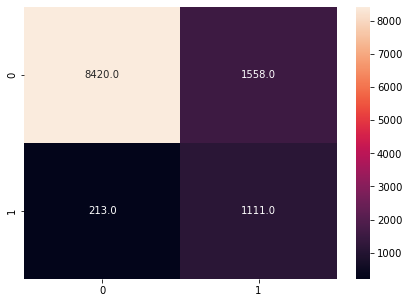

In [131]:
cm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize =(7,5))
sns.heatmap(cm, annot=True, fmt = '.1f')

In [132]:
from sklearn.metrics import roc_auc_score
auc_score_2 = (roc_auc_score(y_test, model_RF.predict_proba(X_test_scaled)[:, 1]))*100
print("The AUCROC Score for Random Forest Classifier is: ", round(auc_score_2,3),"%")

The AUCROC Score for Random Forest Classifier is:  91.133 %


# Support Vector Machines

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import HalvingRandomSearchCV, train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, make_scorer


# Define the hyperparameter grid to search over
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto']}

# Create an SVM classifier
svc = SVC(random_state=42)

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the halving search object
halving_search = HalvingRandomSearchCV(
    svc, 
    param_grid, 
    factor=2, 
    random_state=42, 
    scoring=make_scorer(roc_auc_score), 
    n_jobs=-1, 
    cv=cv)

# Fit the halving search object on the training data
halving_search.fit(X_train_scaled, yt_smt)

# Print the best hyperparameters and score
print("Best hyperparameters: ", halving_search.best_params_)
print("Best score: ", halving_search.best_score_)

# Evaluate the final model on the testing set
y_pred = halving_search.predict(X_train_scaled)
test_score = roc_auc_score(y_test, y_pred)
print("Test score: ", test_score)

In [135]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svm = LinearSVC(max_iter = 1000, C =1)
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(X_train_scaled, yt_smt.values.ravel())

CalibratedClassifierCV(base_estimator=LinearSVC(C=1))

In [136]:
y_predict = model_svm.predict(X_test_scaled)

In [137]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.73      0.83      9978
           1       0.30      0.87      0.44      1324

    accuracy                           0.75     11302
   macro avg       0.64      0.80      0.64     11302
weighted avg       0.90      0.75      0.79     11302



<AxesSubplot:>

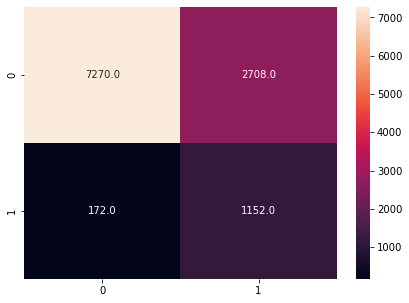

In [138]:
cm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize =(7,5))
sns.heatmap(cm, annot=True, fmt = '.1f')

In [139]:
from sklearn.metrics import roc_auc_score
auc_score_3 = (roc_auc_score(y_test, model_svm.predict_proba(X_test_scaled)[:, 1]))*100
print("The AUCROC Score for Decision Tree is: ", round(auc_score_3,3),"%")

The AUCROC Score for Decision Tree is:  87.801 %


# Decision Tree

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import HalvingRandomSearchCV, train_test_split, StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, make_scorer


# Define the hyperparameter grid to search over
param_grid = {'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Create a Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metric
scoring = make_scorer(roc_auc_score, greater_is_better=True)

# Define the halving search object
halving_search = HalvingRandomSearchCV(
    dtc, 
    param_grid, 
    factor=2, 
    random_state=42, 
    scoring=scoring, 
    n_jobs=-1, 
    cv=cv)

# Fit the halving search object on the training data
halving_search.fit(X_train_scaled, yt_smt)

# Print the best hyperparameters and score
print("Best hyperparameters: ", halving_search.best_params_)
print("Best score: ", halving_search.best_score_)

# Evaluate the final model on the testing set
y_pred = halving_search.predict(X_test_scaled)
test_score = roc_auc_score(y_test, y_pred)
print("Test score: ", test_score)

E:\New folder\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\New folder\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 36 is smaller than n_iter=2575. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters:  {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5}
Best score:  0.8587472473697089
Test score:  0.8108321691406897


In [208]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()

from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score

for depth in [1,3,5,7,9,10,20,25,30,40,50]:
    dt = DecisionTreeClassifier(max_depth=depth) 
    dt.fit(X_train_scaled, yt_smt) 
    trainAccuracy = accuracy_score(yt_smt, dt.predict(X_train_scaled)) 
    dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
    valAccuracy = cross_val_score(dt, X_train_scaled, yt_smt, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7832528555083678  Cross val score :  0.7832138086729901
Depth  :  3  Training Accuracy :  0.8551786995559175  Cross val score :  0.8542866407526702
Depth  :  5  Training Accuracy :  0.880408012876452  Cross val score :  0.8777319175560029
Depth  :  7  Training Accuracy :  0.905889425407722  Cross val score :  0.9021080620870832
Depth  :  9  Training Accuracy :  0.928597746620901  Cross val score :  0.919852037789966
Depth  :  10  Training Accuracy :  0.9354238175577404  Cross val score :  0.9231099262821569
Depth  :  20  Training Accuracy :  0.9988752496751798  Cross val score :  0.9491733087642291
Depth  :  25  Training Accuracy :  1.0  Cross val score :  0.9498131931215534
Depth  :  30  Training Accuracy :  1.0  Cross val score :  0.9491344776349996
Depth  :  40  Training Accuracy :  1.0  Cross val score :  0.9505694881271143
Depth  :  50  Training Accuracy :  1.0  Cross val score :  0.9503174487124463


In [148]:
# Depth after tuning is better at '20' where auroc & cross val score are fitting well
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score

model_DT = DecisionTreeClassifier(max_depth = 20, min_samples_split = 2, min_samples_leaf = 4)
model_DT.fit(X_train_scaled, yt_smt)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=4)

In [149]:
y_predict = model_DT.predict(X_test_scaled)

In [150]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      9978
           1       0.39      0.73      0.51      1324

    accuracy                           0.84     11302
   macro avg       0.68      0.79      0.71     11302
weighted avg       0.89      0.84      0.86     11302



<AxesSubplot:>

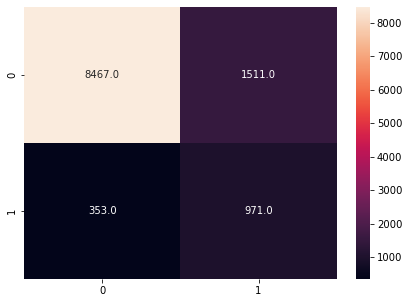

In [151]:
cm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize =(7,5))
sns.heatmap(cm, annot=True, fmt = '.1f')

In [152]:
from sklearn.metrics import roc_auc_score
auc_score_4 = (roc_auc_score(y_test, model_DT.predict_proba(X_test_scaled)[:, 1]))*100
print("The AUCROC Score for Decision Tree is: ", round(auc_score_4,3),"%")

The AUCROC Score for Decision Tree is:  83.872 %


# KNN

In [153]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import make_scorer, accuracy_score


# Define the hyperparameter space for KNN
param_distributions = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
}

# Define the scoring metric
scoring = make_scorer(roc_auc_score, greater_is_better=True)

# Define the HalvingRandomSearchCV object
halving_search = HalvingRandomSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_distributions,
    scoring=scoring,
    n_jobs=-1,
    factor=2,
    max_resources='auto',
    cv=5,
    random_state=42,
)

# Fit the HalvingRandomSearchCV object to the training data
halving_search.fit(X_train_scaled, yt_smt)

# Get the best hyperparameters and score
best_params = halving_search.best_params_
best_score = halving_search.best_score_

# Get the final predicted output on the test data
y_pred = halving_search.predict(X_test_scaled)

# Compute the test score
test_score = roc_auc_score(y_test, y_pred)

print("Best score: {:.3f}".format(best_score))
print("Test score: {:.3f}".format(test_score))
print("Best parameters:", best_params)

E:\New folder\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\New folder\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 360 is smaller than n_iter=2575. Running 360 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
E:\New folder\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.83333333 0.83333333 0.9        0.9        0.73333333 0.83333333
 0.73333333 0.9        0.7        0.8        0.83333333 0.83333333
 0.83333333 0.9        0.86666667 0.93333333 1.         1.
 0.96666667 0.96666667 0.93333333 0.96666667 0.93333333 0.96666667
 0.9        0.9        0.76666667 0.76666667 0.9        1.
 0.93333333 0.96666667 0.76666667 0.9        0.86666667 0.86666

Best score: 0.904
Test score: 0.827
Best parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 19, 'algorithm': 'ball_tree'}


In [214]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

for i in [1,2,3,4,5,6,7,8,9,10,15,20]:
    model_knn = KNeighborsClassifier(i)
    model_knn.fit(X_train_scaled, yt_smt.values.ravel())
    accu_score = accuracy_score(yt_smt.values.ravel(), model_knn.predict(X_train_scaled))
    model_knn = KNeighborsClassifier(i)
    val_score = cross_val_score(model_knn, X_train_scaled, yt_smt.values.ravel(), cv = 10)
    print("k Value: ",i, "Train Score: ", accu_score, "CV Score: ", np.mean(val_score))

k Value:  1 Train Score:  1.0 CV Score:  0.9414355528116145
k Value:  2 Train Score:  0.9841177497236605 CV Score:  0.9305953983626314
k Value:  3 Train Score:  0.965287877906413 CV Score:  0.9339694906544285
k Value:  4 Train Score:  0.9619718036728916 CV Score:  0.9304401603460495
k Value:  5 Train Score:  0.9521399344542052 CV Score:  0.9295286536500962
k Value:  6 Train Score:  0.9506467314367716 CV Score:  0.9271240044751515
k Value:  7 Train Score:  0.9444799968972405 CV Score:  0.9258247167715729
k Value:  8 Train Score:  0.9433940310663796 CV Score:  0.9245642526754555
k Value:  9 Train Score:  0.9392246979657533 CV Score:  0.9233424805558528
k Value:  10 Train Score:  0.9378672406771773 CV Score:  0.9208215410809654
k Value:  15 Train Score:  0.9287528845967382 CV Score:  0.9170593969978815
k Value:  20 Train Score:  0.9239048228518238 CV Score:  0.9148100347310134


In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

model_knn = KNeighborsClassifier(weights = 'distance', p = 1, n_neighbors = 20, algorithm= 'ball_tree')
model_knn.fit(X_train_scaled, yt_smt.values.ravel())

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=20, p=1,
                     weights='distance')

In [159]:
model_knn.score(X_test_scaled, y_test)

0.806405945850292

In [160]:
y_predict = model_knn.predict(X_test_scaled)

In [161]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      9978
           1       0.36      0.85      0.51      1324

    accuracy                           0.81     11302
   macro avg       0.67      0.83      0.69     11302
weighted avg       0.90      0.81      0.84     11302



<AxesSubplot:>

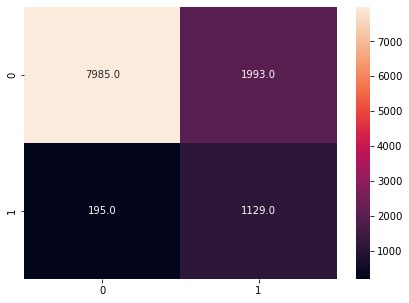

In [162]:
cm = confusion_matrix(y_test,y_predict)
fig, ax = plt.subplots(figsize=(7,5))  
sns.heatmap(cm, annot = True, fmt=".1f")

In [163]:
from sklearn.metrics import roc_auc_score
auc_score_5 = (roc_auc_score(y_test, model_knn.predict_proba(X_test_scaled)[:, 1]))*100
print("The AUCROC Score for Decision Tree is: ", round(auc_score_5,3),"%")

The AUCROC Score for Decision Tree is:  89.409 %


# XG Boost

In [165]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

# Define the hyperparameter space for XGBoost
param_distributions = {
    'learning_rate': np.logspace(-4, 0, 100),
    'max_depth': np.arange(2, 10),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'gamma': np.logspace(-4, 0, 100),
}

# Define the scoring metric
scoring = make_scorer(roc_auc_score, greater_is_better=True)

# Define the HalvingRandomSearchCV object
halving_search = HalvingRandomSearchCV(
    XGBClassifier(),
    param_distributions=param_distributions,
    scoring=scoring,
    n_jobs=-1,
    factor=2,
    max_resources='auto',
    cv=5,
    random_state=42,
)

# Fit the HalvingRandomSearchCV object to the training data
halving_search.fit(X_train_scaled, yt_smt)

# Get the best hyperparameters and score
best_params = halving_search.best_params_
best_score = halving_search.best_score_

# Get the final predicted output on the test data
y_pred = halving_search.predict(X_test_scaled)

# Compute the test score
test_score = roc_auc_score(y_test, y_pred)

print("Best score: {:.3f}".format(best_score))
print("Test score: {:.3f}".format(test_score))
print("Best parameters:", best_params)


E:\New folder\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best score: 0.962
Test score: 0.844
Best parameters: {'subsample': 0.8, 'max_depth': 9, 'learning_rate': 0.08111308307896872, 'gamma': 0.521400828799969, 'colsample_bytree': 0.5}


In [226]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.04,0.08,0.1,0.15,0.2,0.5,0.6,0.7,1]:
    model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) 
    model.fit(X_train_scaled,yt_smt) 
    model.score(X_test_scaled, y_test) # scoring the model - r2 squared
    print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled,yt_smt), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled, yt_smt, cv=10)))

Learning rate :  0.01  Train score :  0.9196967052572381  Cross-Val score :  0.9152947262023661
Learning rate :  0.04  Train score :  0.9474857951790874  Cross-Val score :  0.9421532573845338
Learning rate :  0.08  Train score :  0.9614094285104815  Cross-Val score :  0.9549329261348806
Learning rate :  0.1  Train score :  0.9656757228460061  Cross-Val score :  0.9573376430057408
Learning rate :  0.15  Train score :  0.9751197471250994  Cross-Val score :  0.9615071735857159
Learning rate :  0.2  Train score :  0.9801035545988713  Cross-Val score :  0.965327449655676
Learning rate :  0.5  Train score :  0.9926309461477302  Cross-Val score :  0.9676547111167075
Learning rate :  0.6  Train score :  0.9952101149960246  Cross-Val score :  0.9682945917131475
Learning rate :  0.7  Train score :  0.9969360249772141  Cross-Val score :  0.9677516667110451
Learning rate :  1  Train score :  0.9993018791087324  Cross-Val score :  0.9677516215804347


In [180]:
import xgboost as xgb

model_XGB = xgb.XGBClassifier(learning_rate = 0.08, max_depth = 9, verbosity = 0, gamma = 0.5, colsample_bytree = 0.5, subsample = 0.8)
model_XGB.fit(X_train_scaled,yt_smt) #train the model
model_XGB.score(X_test_scaled, y_test) # scoring the model - r2 squared

0.8585206158202088

In [181]:
y_predict = model_XGB.predict(X_test_scaled)

In [184]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.86      0.92      9978
           1       0.44      0.83      0.58      1324

    accuracy                           0.86     11302
   macro avg       0.71      0.84      0.75     11302
weighted avg       0.91      0.86      0.88     11302



<AxesSubplot:>

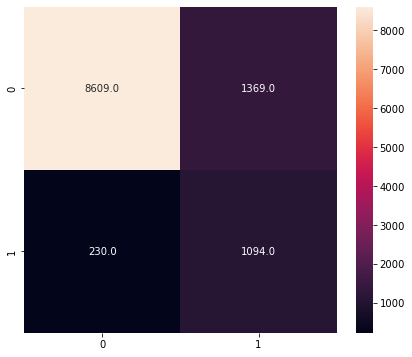

In [182]:
cm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize=(7,6))
sns.heatmap(cm, annot = True, fmt=".1f")

In [183]:
from sklearn.metrics import roc_auc_score
auc_score_6 = roc_auc_score(y_test, model_XGB.predict_proba(X_test_scaled)[:, 1])
print("The AUCROC Score for XGBoost Classifier is: ", auc_score_6)

The AUCROC Score for XGBoost Classifier is:  0.9174856890597378


# Evaluation Metrics & Graphs

In [185]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test_scaled)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test_scaled)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_RF.predict_proba(X_test_scaled)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_DT.predict_proba(X_test_scaled)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_knn.predict_proba(X_test_scaled)[:, 1], pos_label = 1)
fpr6, tpr6, thresh6 = roc_curve(y_test, model_XGB.predict_proba(X_test_scaled)[:, 1], pos_label = 1)


In [186]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test_scaled)[:, 1])*100
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test_scaled)[:, 1])*100
auc_score3 = roc_auc_score(y_test, model_RF.predict_proba(X_test_scaled)[:, 1])*100
auc_score4 = roc_auc_score(y_test, model_DT.predict_proba(X_test_scaled)[:, 1])*100
auc_score5 = roc_auc_score(y_test, model_knn.predict_proba(X_test_scaled)[:, 1])*100
auc_score6 = roc_auc_score(y_test, model_XGB.predict_proba(X_test_scaled)[:, 1])*100

print("Logistic Regression: ", round(auc_score1,5)) # Logistic Regression
print("Support Vector Machine: ", round(auc_score2,5)) # Support Vector Machine
print("Random Forest: ", round(auc_score3,5)) # Random Forest
print("Decision Tree ", round(auc_score4,5)) # Descision Tree 
print("K-Nearest Neighbors: ", round(auc_score5,5)) # K-Nearest Neighbors
print("XGBoost : ", round(auc_score6,5)) # XGBoost

Logistic Regression:  87.78377
Support Vector Machine:  87.80088
Random Forest:  91.13308
Decision Tree  83.872
K-Nearest Neighbors:  89.40853
XGBoost :  91.74857


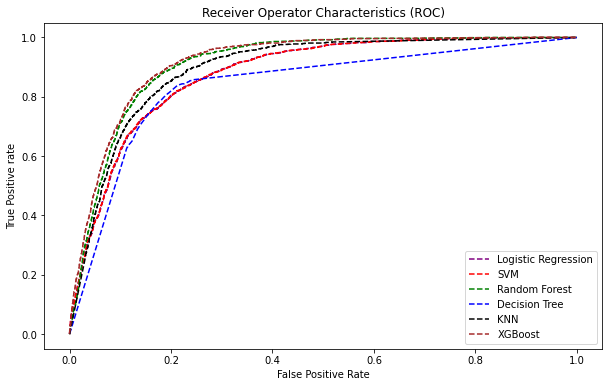

In [187]:
plt.figure(figsize=(10,6))

plt.plot(fpr1, tpr1, linestyle = "--", color = "purple", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "blue", label = "Decision Tree")
plt.plot(fpr5, tpr5, linestyle = "--", color = "black", label = "KNN")
plt.plot(fpr6, tpr6, linestyle = "--", color = "brown", label = "XGBoost")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

# Data Inference

From the EDA & Analysis of feature importance we can discuss on major areas where the Insurance company could focus on to increase their conversion rate.

These are some of the few suggestions to the company:

1) The Top Features are:
    
    - Duration
    - Age
    - Day
    - Month
    - Previous Outcome
    - Job
    - Num of Calls, etc
  
  Focusing on these values would help to narrow down and enhance the process of conversion within the organization
  
2) The Num of calls should be made more on the months with max conversion as per the dataset
    - march, december, september, october

3) Database helps to narrow down a few job entities to which max efforts can be put to maximize conversion
    - Student, retired, unemployed, management, admin

4) Success on prev_outcome has a massive impact on conversion again, we can focus on strategies to make people convert again with feedback based on success customers

5) Taget mean with repect to dates show that many people have been converted at month start, month end, mid week or 10 days from start of the week. With this pattern we can focus on contacts with clients to make sure they are converted

# Model Inference

We have choosen 6 models to find out which models does better with the imbalanced dataset

The respective models are:
    
    - Logistic Regression
    - SVM Classifier
    - Random Forest Classifier
    - Decision Tree Classifier
    - KNN Classifier
    - XGBoost Classifier
 
Using Halving Random Search Cross Validation Technique, we have fed the model to get the best parameters that give in the maximum AUROC values for the same to fit the model 

This is faster in computation with respect to Grid Search CV & Random Search CV

After Fitting the models, we have seen from the classification report for the values of precicion, F1-score, Re-call & Accuracy values in predicting 
    
    - class "0" : no ( Customer not Converted )
    
    - class "1" : yes ( Customer Converted )
    
With the Confusion Matrix, we can identify how much True Positives & False positives are identified corretly by the model to understand the accuracy of it

Lastly, we have calculated the AUROC Values for the respective models as it is the best evaluation metric when you have a imbalanced dataset

From the Classification Report, Graph of ROC & AUROC Values, we can find that
     
     - "XGBOOST CLASSIFIER" & "RANDOM FOREST CLASSIFIER" have good AUROC values, accuracy of identifying the TP, TN, FP & FN are high than that of the other models
    
     - Overall, "XGBOOST CLASSIFIER" has AUROC around 92% for this model which has identified the TP, TN, FP & FN better than random forest classifier